<a href="https://colab.research.google.com/github/halynadanchukda/ab-testing-background-theme/blob/main/A_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Importing necessary libraries for data analysis, visualization, and statistics
import pandas as pd
import math
from scipy.stats import shapiro, mannwhitneyu, kruskal

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Mounting Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MateStudy/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MateStudy


In [53]:
# Reading the CSV file with A/B testing data into a pandas DataFrame
df = pd.read_csv('ab_testing.csv')

# Displaying the first 5 rows of the dataset to verify it loaded correctly
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [54]:
# Displaying general information about the dataset: Number of rows and columns, Data types of each column, Number of non-null (non-missing) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [55]:
# Converting 'User ID' column to string type (IDs are identifiers, not numbers)
df['User ID'] = df['User ID'].astype('string')

# Converting categorical columns to 'category' type for memory efficiency and easier analysis
df['Group'] = df['Group'].astype('category')
df['Conversion'] = df['Conversion'].astype('category')
df['Location'] = df['Location'].astype('category')

#A/B Test Card

**Title:** A/B Test of New Website Background

**Start Date:**

**End Date:**

**Відповідальні:**

## Description

**Goal:** To check whether changing the background color from white to black increases the average time users spend on the website.

**Hypothesis (H1):** If the website background is changed from white to black, users will spend more time on the site because the interface will be more comfortable for their eyes.

**Null Hypothesis (H0):**
Changing the background color does not affect the time users spend on the site.

## Variants

**Variant A (Control):** White background — current design

**Variant B (Experiment):** Black background — new design

## Sample

**Target audience:** All website visitors (desktop and mobile).
**Traffic split:** 50% for varian A, 50% for variant B.

## Metrics

**Primary metric:** Average time on site ((Average Time = Time Spent / Page Views)

**Secondary metrics:** session duration, number of page views per session

## Results

Before conducting hypothesis testing, the normality of the primary metric (Average Time) was assessed using the Shapiro–Wilk test. Both control (A) and experimental (B) groups showed non-normal data distributions (p < 0.05), which justified using non-parametric statistical methods.

The Mann–Whitney U test was applied to compare the median average time between groups A and B. The resulting p-value (≈ 0.766) indicated that the difference between the two groups was not statistically significant.

To gain deeper insights, the data was segmented by device type (mobile vs desktop) and by region (England, Scotland, Wales, and Northern Ireland). Since these subgroups also showed non-normal distributions, the Kruskal–Wallis test was used. The results (p ≈ 0.95 for devices, p ≈ 0.32 for regions) confirmed that there were no significant differences within those segments either.

Overall, the analysis shows that changing the website’s background color did not have a measurable impact on how long users stayed on the site. Therefore, the null hypothesis (H₀) cannot be rejected.

## Conclusions and recommendations

**Next steps:** Based on these results, the recommendation is not to implement the black background for all users at this stage. The white background should remain the default design, as there is no evidence of improvement in user engagement. However, it may still be valuable to test a dark mode feature as an optional setting and continue exploring other UI changes that could enhance comfort and readability.



In [56]:
# Calculating the average time spent per page view
df['Average Time'] = round(df['Time Spent'] / df['Page Views'], 2)

# Displaying the first few rows to check the new column
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location,Average Time
0,14292,B,3,424,No,Mobile,Northern Ireland,141.33
1,11682,A,9,342,No,Mobile,Scotland,38.00
2,19825,A,2,396,No,Desktop,Northern Ireland,198.00
3,16080,B,4,318,No,Desktop,Wales,79.50
4,18851,A,1,338,Yes,Desktop,Scotland,338.00


In [57]:
# Creating a subset of the data for users in group A
group_a = df[df['Group'] == 'A']

In [58]:
# Testing normality of 'Average Time' distribution in group A using Shapiro-Wilk test
_, p_value_a = shapiro(group_a['Average Time'])
print(f'Shapiro-Wilk for group A: {p_value_a}')

# Interpreting the result: if p < 0.05, data is not normally distributed
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

Shapiro-Wilk for group A: 3.1573578613786365e-59
Data distribution is not normal


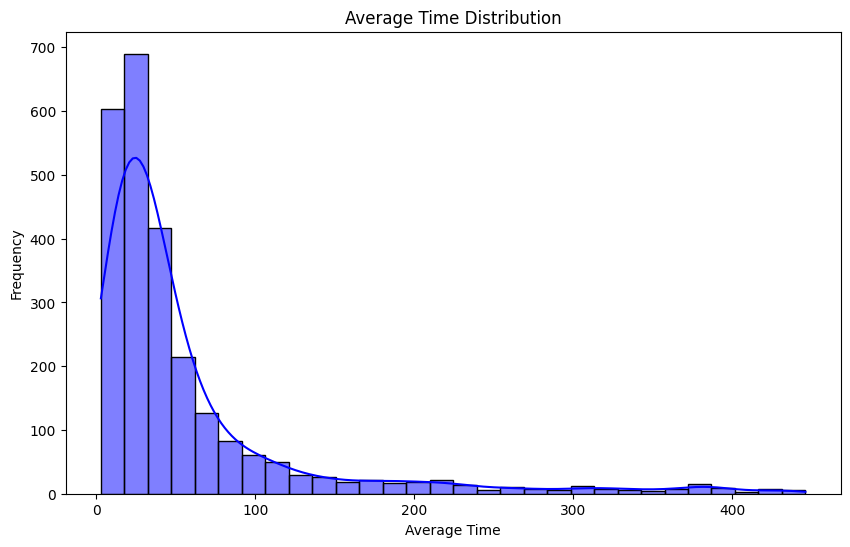

In [59]:
# Visualizing the distribution of 'Average Time' for group A to check for outliers
plt.figure(figsize=(10, 6))

# Creating a histogram with kernel density estimate
sns.histplot(group_a['Average Time'], kde=True, color='blue', bins=30)

# Adding title and axis labels
plt.title('Average Time Distribution')
plt.xlabel('Average Time')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

In [60]:
# Creating a subset of the data for users in group B
group_b = df[df['Group'] == 'B']

In [61]:
# Testing normality of 'Average Time' distribution in group B using Shapiro-Wilk test
_, p_value_b = shapiro(group_b['Average Time'])
print(f'Shapiro-Wilk for group B: {p_value_b}')

# Interpreting the result: if p < 0.05, data is not normally distributed
if p_value_b < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

Shapiro-Wilk for group B: 1.3864361431214558e-58
Data distribution is not normal


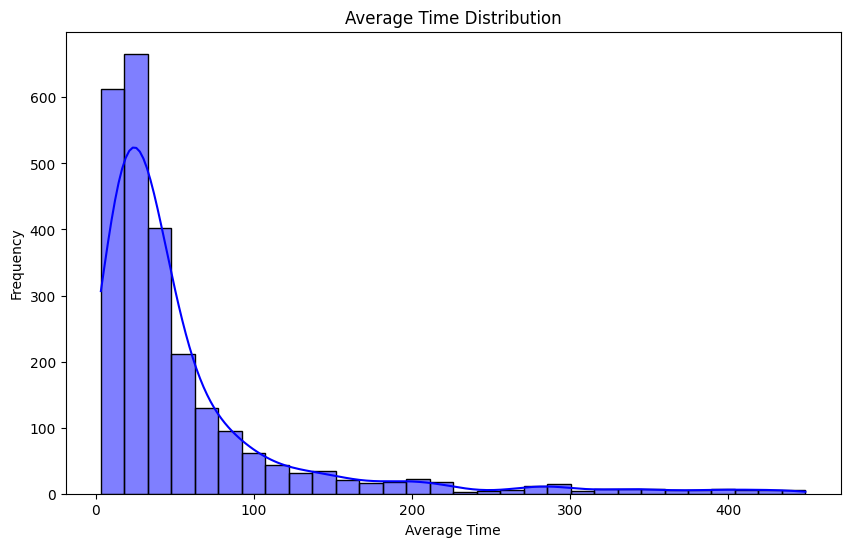

In [62]:
# Visualizing the distribution of 'Average Time' for group B to detect outliers
plt.figure(figsize=(10, 6))

# Creating a histogram with kernel density estimate
sns.histplot(group_b['Average Time'], kde=True, color='blue', bins=30)

# Adding title and axis labels
plt.title('Average Time Distribution')
plt.xlabel('Average Time')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [63]:
# Comparing 'Average Time' between group A and group B using Mann-Whitney U test. Non-parametric test is used because both groups are not normally distributed
u_stat, p_value = mannwhitneyu(group_a['Average Time'], group_b['Average Time'], alternative = 'two-sided')
print(f'Mann-Whitney test - u_stat:{u_stat}, p_value:{p_value}')

Mann-Whitney test - u_stat:3109657.5, p_value:0.7664035080491811


In [64]:
# Checking unique device types in group B
group_b['Device'].unique()

array(['Mobile', 'Desktop'], dtype=object)

In [65]:
# Filtering data for users in group B who used mobile devices
group_b_mobile = group_b[group_b['Device'] == 'Mobile']
group_b_mobile.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location,Average Time
0,14292,B,3,424,No,Mobile,Northern Ireland,141.33
7,10041,B,9,292,No,Mobile,Northern Ireland,32.44
17,18448,B,12,95,No,Mobile,Wales,7.92
22,18361,B,3,80,No,Mobile,England,26.67
25,19369,B,2,137,No,Mobile,Northern Ireland,68.50


In [66]:
# Filtering data for users in group B who used desktop devices
group_b_desktop = group_b[group_b['Device'] == 'Desktop']
group_b_desktop.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location,Average Time
3,16080,B,4,318,No,Desktop,Wales,79.50
5,13134,B,2,93,No,Desktop,Scotland,46.50
8,13191,B,8,434,No,Desktop,Northern Ireland,54.25
9,14427,B,12,271,No,Desktop,England,22.58
12,16270,B,12,123,No,Desktop,Wales,10.25


In [67]:
# Testing normality of 'Average Time' for B group (Mobile users)
_, p_value_b_mobile = shapiro(group_b_mobile['Average Time'])
print(f'Shapiro-Wilk for group B mobile: {p_value_b_mobile}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

Shapiro-Wilk for group B mobile: 5.337174341362056e-45
Data distribution is not normal


In [68]:
# Testing normality of 'Average Time' for B group (Desktop users)
_, p_value_b_desktop = shapiro(group_b_desktop['Average Time'])
print(f'Shapiro-Wilk for group B desktop: {p_value_b_desktop}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

Shapiro-Wilk for group B desktop: 7.210560839504751e-46
Data distribution is not normal


In [69]:
# Comparing multiple subgroups (A, Mobile, Desktop) using Kruskal-Wallis test. Non-parametric alternative to ANOVA when data is not normal
_, p_value_kr = kruskal(group_a['Average Time'], group_b_mobile['Average Time'], group_b_desktop['Average Time'])
print(f'Kruskal_Walis test, p_value:{p_value_kr}')
if p_value_kr < 0.05:
  print(f'There is a significant difference')
else:
  print(f'There is no significant difference')

Kruskal_Walis test, p_value:0.9545118678604515
There is no significant difference


In [70]:
# Checking all unique locations in the dataset
df['Location'].unique()

['Northern Ireland', 'Scotland', 'Wales', 'England']
Categories (4, object): ['England', 'Northern Ireland', 'Scotland', 'Wales']

In [71]:
# Subset group B by location: Northern Ireland, England, Scotland, and Wales

group_b_northen_ireland = group_b[group_b['Location'] == 'Northern Ireland']
group_b_england = group_b[group_b['Location'] == 'England']
group_b_scotland = group_b[group_b['Location'] == 'Scotland']
group_b_wales = group_b[group_b['Location'] == 'Wales']

In [72]:
# Testing normality of 'Average Time' distribution within each subgroup

# Normality test for group B users in Northern Ireland
_, p_value_group_b_northen_ireland = shapiro(group_b_northen_ireland['Average Time'])
print(f'Shapiro-Wilk for group B Northen Ireland: {p_value_group_b_northen_ireland}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

# Normality test for group B users in England
_, p_value_group_b_england = shapiro(group_b_england['Average Time'])
print(f'Shapiro-Wilk for group B England: {p_value_group_b_england}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

# Normality test for group B users in Shapiro
_, p_value_group_b_scotland = shapiro(group_b_scotland['Average Time'])
print(f'Shapiro-Wilk for group B Scotland: {p_value_group_b_scotland}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

# Normality test for group B users in Wales
_, p_value_group_b_wales = shapiro(group_b_wales['Average Time'])
print(f'Shapiro-Wilk for group B Wales: {p_value_group_b_wales}')
if p_value_a < 0.05:
  print(f'Data distribution is not normal')
else:
  print(f'Data distribution is  normal')

Shapiro-Wilk for group B Northen Ireland: 4.702065425180445e-34
Data distribution is not normal
Shapiro-Wilk for group B England: 2.448979507686587e-35
Data distribution is not normal
Shapiro-Wilk for group B Scotland: 7.883464050241674e-34
Data distribution is not normal
Shapiro-Wilk for group B Wales: 7.23402746355726e-34
Data distribution is not normal


In [73]:
# Comparing multiple regions using Kruskal-Wallis test
# Used to check if there are significant differences in 'Average Time' between locations

_, p_value_kr = kruskal(group_a['Average Time'], group_b_northen_ireland['Average Time'], group_b_england['Average Time'], group_b_scotland['Average Time'], group_b_wales['Average Time'])
print(f'Kruskal_Walis test, p_value:{p_value_kr}')
if p_value_kr < 0.05:
  print(f'There is a significant difference')
else:
  print(f'There is no significant difference')

Kruskal_Walis test, p_value:0.3212820106700047
There is no significant difference


# Tableau Visualization

Here's the link for an interactive visualization in Tableau: https://public.tableau.com/app/profile/halyna.danchuk/viz/ABTestingAnalysis_17598424481440/Dashboard1